In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.__version__
%matplotlib inline

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

# Train Test Spliting 

In [7]:
X = df.drop(['target'], axis=1)
y = df['target']
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [8]:
print("----------X coloumn-------- ")
print(X.head())
print("----------Y coloumn-------- ")
print(y.head())

----------X coloumn-------- 
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


In [11]:
print("X train set shpae - ",X_train.shape)
print("y train set shpae - ",y_train.shape)
print("X test set shpae - ",X_test.shape)
print("y test set shpae - ",y_test.shape)

X train set shpae -  (142, 13)
y train set shpae -  (142,)
X test set shpae -  (36, 13)
y test set shpae -  (36,)


In [12]:
rf_Model = RandomForestClassifier()

In [13]:
rf_Model.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
rf_Model.predict(X_test)

array([2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 1, 2, 1, 2], dtype=int64)

In [15]:
pred=rf_Model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)*100

97.22222222222221

In [16]:
pd.Series(pred).value_counts() # getting the count of each category 

1    13
0    13
2    10
dtype: int64

In [17]:
y_test.value_counts()

1    14
0    13
2     9
Name: target, dtype: int64

In [18]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.96        14
           2       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [20]:
print(confusion_matrix(y_test,pred))

[[13  0  0]
 [ 0 13  1]
 [ 0  0  9]]


In [21]:
dt = confusion_matrix(y_test, pred)

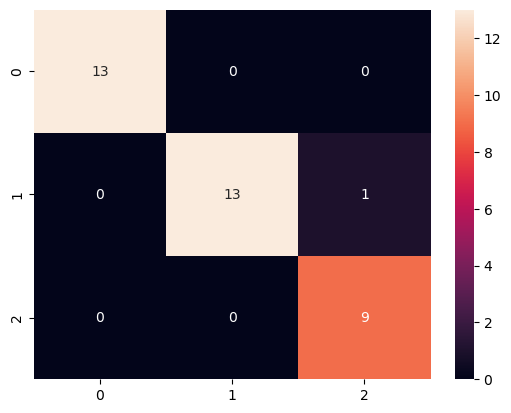

In [22]:
sns.heatmap(dt,annot=True)
plt.savefig('ConfusionRF.png')

In [23]:
print("Testing Accuracy","\n")
rf_Model.score(X_test,y_test)

Testing Accuracy 



0.9722222222222222

## Cross Validation Score

In [27]:
rfc = RandomForestClassifier()

In [28]:
# Perform 10-fold cross-validation
scores = cross_val_score(rfc, X, y, cv=10)
scores

array([0.94444444, 1.        , 0.94444444, 0.94444444, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [29]:
scores.mean()*100

98.33333333333331

### Improved with cv=10